In [12]:
import dataframe_image as dfi
import pipeline as p
import pandas as pd
import numpy as np
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

METRIC_MAP = {
    "psnr": "PSNR",
    "ssim": "SSIM",
    "ks": "KS",
    "p_val": "P-Value",
    "ws": "Wasserstein Metric",
    "stego_psnr": "PSNR (Stego)",
    "stego_ssim": "SSIM (Stego)",
    "stego_ws": "Wasserstein (Stego)",
    "recovered_psnr": "PSNR (Recovered)",
    "recovered_ssim": "SSIM (Recovered)",
    "recovered_ws": "Wasserstein (Recovered)",
}

METHOD_LABEL_MAP = {
    "qr ({})": "QR Only",
    "dwt_qr ({})": "DWT -> QR",
    "dft_qr ({})": "FFT -> QR",
    "qr_dwt ({})": "QR -> DWT",
    "qr_dft ({})": "QR -> FFT",
    "qr_both_dwt ({})": "QR (both) -> DWT",
    "qr_both_dft ({})": "QR (both) -> FFT",
}


In [23]:
df = pd.read_csv(os.path.join("evaluation", "eval-dataframe-wavelet.csv"))
df.drop(columns=['stego_ks', 'recovered_ks', 'stego_p_val', 'recovered_p_val'], inplace=True)
df = df.melt(id_vars=["method"], value_vars=df.columns[:-1], var_name="eval_metric")
# df = df.groupby(["method", "eval_metric"]).median().reset_index()
for eval_metric in ["psnr", "ssim", "ws"]:
    specific_df = df[df["eval_metric"].str.contains(eval_metric)]
    specific_df['eval_metric'] = specific_df['eval_metric'].replace(METRIC_MAP.keys(), METRIC_MAP.values())
    
    # print(specific_df)
    fig = px.box(
        specific_df,
        x="method",
        y="value",
        color="eval_metric",
        facet_col="eval_metric",
        # barmode="group",
        title=f"{METRIC_MAP[eval_metric]} Value per Stego Method",
    )

    fig.update_xaxes(
        tickangle=45,
        title_text="Stegonography Method",
    )
    # Updat 
    # fig.update_yaxes(
    #     title_text=f"{METRIC_MAP[eval_metric]} Value", title_font={"size": 20}
    # )
    fig.show()

    continue

C:\Users\casil\AppData\Local\Temp\ipykernel_25008\27618359.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\casil\AppData\Local\Temp\ipykernel_25008\27618359.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\casil\AppData\Local\Temp\ipykernel_25008\27618359.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df = pd.read_csv(os.path.join("evaluation", "eval-dataframe.csv"))

In [21]:
# df = df.melt(id_vars=["method"], value_vars=df.columns[:-1], var_name="eval_metric")
aggregated = df.groupby('method').median()
aggregated.drop(columns=['stego_ks', 'recovered_ks', 'stego_p_val', 'recovered_p_val'], inplace=True)
aggregated.to_csv('evaluation/median-aggregated.csv')

In [6]:
    df = pd.read_csv(os.path.join("evaluation", "eval-dataframe.csv"))
    # Melt the df to get access to the different types
    df = df.melt(id_vars=["method"], value_vars=df.columns[:-1], var_name="eval_metric")
    print(METHOD_LABEL_MAP)
    df["method"] = df["method"].replace(
        METHOD_LABEL_MAP.keys(), METHOD_LABEL_MAP.values()
    )
    # df['eval_metric'] = df['eval_metric'].replace(METRIC_MAP.keys(), METRIC_MAP.values())
    # Aggregate by getting the median value for each method and metric
    # aggregated = df.groupby(["method", "eval_metric"]).median().reset_index()
    # print(aggregated.head())

    # px.sunburst(df, path=["eval_metric", "method"], values='value').show()
    for eval_metric in ["psnr", "ssim", "ws"]:
        specific_df = df[df["eval_metric"].str.contains(eval_metric)]
        specific_df['eval_metric'] = specific_df['eval_metric'].replace(METRIC_MAP.keys(), METRIC_MAP.values())
        
        # print(specific_df)
        fig = px.box(
            specific_df,
            x="method",
            y="value",
            color="eval_metric",
            facet_col="eval_metric",
            # barmode="group",
            title=f"{METRIC_MAP[eval_metric]} Value per Stego Method",
        )

        fig.update_xaxes(
            tickangle=45,
            title_text="Stegonography Method",
        )
        # Updat 
        # fig.update_yaxes(
        #     title_text=f"{METRIC_MAP[eval_metric]} Value", title_font={"size": 20}
        # )
        fig.show()

        continue

{'qr ({})': 'QR Only', 'dwt_qr ({})': 'DWT -> QR', 'dft_qr ({})': 'FFT -> QR', 'qr_dwt ({})': 'QR -> DWT', 'qr_dft ({})': 'QR -> FFT', 'qr_both_dwt ({})': 'QR (both) -> DWT', 'qr_both_dft ({})': 'QR (both) -> FFT'}


C:\Users\casil\AppData\Local\Temp\ipykernel_26988\418680769.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\casil\AppData\Local\Temp\ipykernel_26988\418680769.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\casil\AppData\Local\Temp\ipykernel_26988\418680769.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



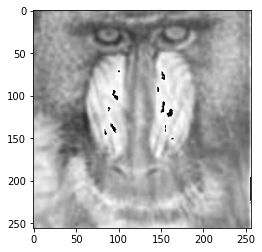

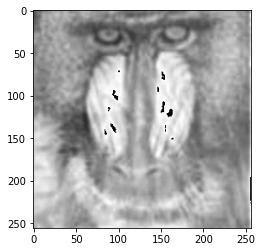

secovered


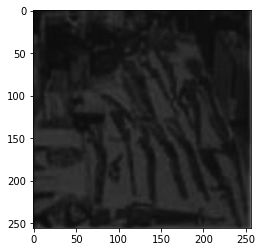

In [10]:
import pipeline as p

cover_path = os.path.join("images", "cover", "baboon.jpg")
secret_path = os.path.join("images", "secret", "message-file-paper.jpg")

cover = p._load_image(cover_path)
secret = p._load_image(secret_path)
cover += secret
p._show_image(cover)
stego, recovered = p.qr_dwt(cover, secret)
p._show_image(stego)
print('recovered')
p._show_image(recovered)



